# Analytics test
## The various steps performed on this data before the fitting of data is done.

* Univariate analysis
* NAN identification
* Variance observation



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier


In [2]:
features = pd.read_csv('machine.csv')
features.head(10)

,Machine_speed,Machine_state,M12_ENZYME_FLOW,M12_STABILIZER_FLOW,M12_TEMPERATURE,M12_WATER_NR,M12_WETTING_AGENT_FLOW,M18_TEMPERATURE,M19_RESERVE_NR,M19_STABILIZER_FLOW,M19_TEMPERATURE,M19_WETTING_AGENT_FLOW
0,46.973335,0,2.499970,2.066773,54.559528,949946.0000,2.991859,98.685355,10730.5,1.525074,56.871289,2.157189
1,46.973335,0,2.497196,2.101614,54.962861,949984.6667,2.992938,98.727884,10731.0,1.508612,56.878337,2.152422
2,46.973335,0,2.499792,2.113061,54.796452,950017.6667,2.996020,98.700322,10732.0,1.514143,56.905778,2.108552
3,46.973335,0,2.499559,2.129736,54.731283,950052.8000,2.996281,98.639509,10732.4,1.488390,56.968360,2.086052
4,46.973335,0,2.500058,2.093854,54.844514,950088.5000,2.988235,98.521231,10733.0,1.509662,57.011485,2.090726
5,46.973335,0,2.501300,2.134929,54.719098,950120.0000,2.991909,98.391523,10734.0,1.516884,57.065533,2.095202
6,46.973335,0,2.500378,2.082958,54.993215,950159.4000,2.999112,98.262201,10734.4,1.492385,57.116243,2.094006
7,46.973335,0,2.499837,1.839825,54.788962,950182.0000,2.992971,98.198697,10735.0,1.505333,57.246765,2.104141
8,46.973335,0,2.499646,1.957902,55.084868,950223.0000,2.998823,98.072553,10736.0,1.511921,57.205077,2.110120
9,46.973335,0,2.498415,2.121513,55.056075,950257.8333,2.989491,97.944455,10736.5,1.476032,57.245964,2.104826


In [3]:
y = features.Machine_state
x = features.drop(['Machine_state','Machine_speed'],axis = 1)

### The function below performs the univariate analysis on data

In [4]:
def deep_describe(data):
    cmsq = data.describe()
    
    mode = data.mode(axis = 0,numeric_only=True)
    mode = mode.dropna(axis = 0,how='any')
    mode = mode.set_index([['mode']])
    
    median = pd.DataFrame(data.median()).transpose()
    median = median.set_index([['median']])
    
    variance = pd.DataFrame(x.var(0)).T
    variance = variance.set_index([['variance']])
    
    kurtosis = pd.DataFrame(data.kurtosis()).transpose()
    kurtosis = kurtosis.set_index([['kurtosis']])
    
    skew = pd.DataFrame(data.skew()).transpose()
    skew = skew.set_index([['skewness']])
    
    tr = [cmsq,variance,mode,median,skew,kurtosis]
    return pd.concat(tr)

In [5]:
deep_describe(x)

,M12_ENZYME_FLOW,M12_STABILIZER_FLOW,M12_TEMPERATURE,M12_WATER_NR,M12_WETTING_AGENT_FLOW,M18_TEMPERATURE,M19_RESERVE_NR,M19_STABILIZER_FLOW,M19_TEMPERATURE,M19_WETTING_AGENT_FLOW
count,2.988000e+03,2.988000e+03,2.988000e+03,2.988000e+03,2988.000000,2.988000e+03,2988.000000,2988.000000,2.988000e+03,2988.000000
mean,2.170996e+00,1.705574e+00,5.451328e+01,9.902124e+05,2.374626,9.629589e+01,10958.558846,1.494842,5.747148e+01,1.324780
std,8.353066e-01,6.796562e-01,5.262175e+00,1.965182e+04,1.000699,9.441423e+00,147.473730,0.767476,5.761615e+00,0.545401
min,-8.560000e-07,-7.570000e-07,1.370000e-38,9.499460e+05,-0.000002,2.460000e-38,10730.500000,-0.000003,1.450000e-38,-0.018309
25%,2.491944e+00,1.974200e+00,5.473029e+01,9.776498e+05,2.249223,9.673316e+01,10872.000000,1.478241,5.712369e+01,1.489610
50%,2.498786e+00,1.997653e+00,5.499982e+01,9.937956e+05,2.936472,9.786367e+01,10916.000000,1.504285,5.820497e+01,1.499058
75%,2.502232e+00,2.003798e+00,5.525958e+01,1.006039e+06,2.999094,9.837613e+01,11059.000000,1.521707,5.880156e+01,1.502098
max,2.972470e+00,2.425751e+00,6.011282e+01,1.022285e+06,3.215173,1.007535e+02,11300.000000,4.151384,6.130416e+01,3.031350
variance,6.977371e-01,4.619326e-01,2.769049e+01,3.861939e+08,1.001398,8.914047e+01,21748.501079,0.589019,3.319621e+01,0.297462
mode,0.000000e+00,0.000000e+00,1.370000e-38,9.945230e+05,0.000000,2.460000e-38,10916.000000,0.000000,1.450000e-38,0.000000


### Null value analysis

In [6]:
total = x.isnull().sum()
percent1 = x.isnull().sum()*100/x.isnull().count()
percent = (round(percent1,1))
missing_data = pd.concat([total,percent],axis = 1,keys = ['total_null','percent_null']).transpose()
missing_data

,M12_ENZYME_FLOW,M12_STABILIZER_FLOW,M12_TEMPERATURE,M12_WATER_NR,M12_WETTING_AGENT_FLOW,M18_TEMPERATURE,M19_RESERVE_NR,M19_STABILIZER_FLOW,M19_TEMPERATURE,M19_WETTING_AGENT_FLOW
total_null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent_null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### The variance in the above data is not to required scale so the scaling is done.

## Splitting the data
Splitting of the data for testing and training of model in ratio 7:3

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Scaling of data Due to irregular variances

In [8]:
scaler = StandardScaler().fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train),index=x_train.index.values, columns=x_train.columns.values)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), index=x_test.index.values, columns=x_test.columns.values)

c:\users\aish.gupta\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


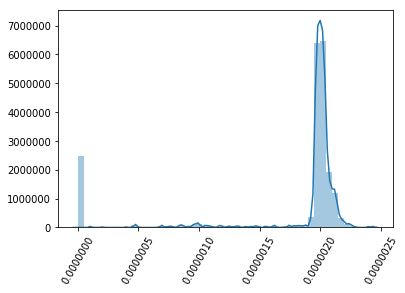

In [9]:
#sns.distplot(x_train_scaled['Machine_speed'])

from sklearn.preprocessing import Normalizer

normal = Normalizer().fit(x_train)
x_train_normalized = pd.DataFrame(normal.transform(x_train),index=x_train.index.values, columns=x_train.columns.values)
df = pd.DataFrame(x_train_normalized['M12_STABILIZER_FLOW'])
g = sns.distplot(df)
for tick in g.get_xticklabels():
    tick.set_rotation(60)

#### Principal component analysis (PCA).
#### Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

In [10]:
pca = PCA()
pca.fit(x_train)
cpts = pd.DataFrame(pca.transform(x_train))
x_axis = np.arange(1, pca.n_components_+1)


pca_scaled = PCA()
pca_scaled.fit(x_train_scaled)
cpts_scaled = pd.DataFrame(pca.transform(x_train_scaled))

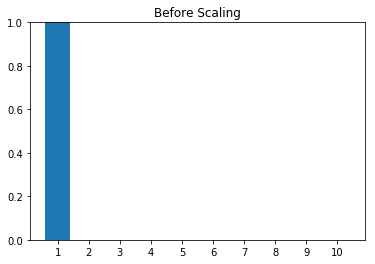

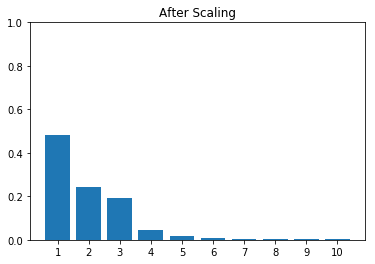

,0
0,M12_ENZYME_FLOW
1,M12_STABILIZER_FLOW
2,M12_TEMPERATURE
3,M12_WATER_NR
4,M12_WETTING_AGENT_FLOW
5,M18_TEMPERATURE
6,M19_RESERVE_NR
7,M19_STABILIZER_FLOW
8,M19_TEMPERATURE
9,M19_WETTING_AGENT_FLOW


In [11]:
plt.bar(x_axis,pca.explained_variance_ratio_)
plt.xticks(x_axis,x_axis)
plt.ylim(0,1)
plt.title('Before Scaling')
plt.show()

plt.bar(x_axis,pca_scaled.explained_variance_ratio_)
plt.xticks(x_axis,x_axis)
plt.ylim(0,1)
plt.title('After Scaling')
plt.show()

pd.DataFrame(x_train.columns)

## REGRESSION BEFORE SCALING

Area under ROC Curve:  0.5
     0  1
0  760  0
1  137  0
                        coefficients
M12_ENZYME_FLOW            -0.000277
M12_STABILIZER_FLOW        -0.000219
M12_TEMPERATURE            -0.000465
M12_WATER_NR                0.000091
M12_WETTING_AGENT_FLOW     -0.000308
M18_TEMPERATURE            -0.001017
M19_RESERVE_NR             -0.008348
M19_STABILIZER_FLOW        -0.000194
M19_TEMPERATURE            -0.000684
M19_WETTING_AGENT_FLOW     -0.000171


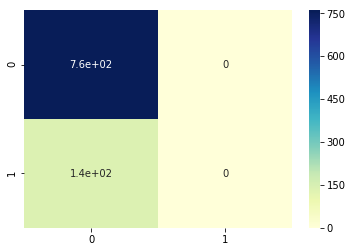

In [12]:
logit = LogisticRegression()
logit = logit.fit(x_train,y_train)
pred = logit.predict(x_test)
print('Area under ROC Curve: ',roc_auc_score(y_test,pred))
cm = pd.DataFrame(confusion_matrix(y_test,pred))
print(cm)
sns.heatmap(cm,annot = True,cmap="YlGnBu")
print(pd.DataFrame(logit.coef_,columns = x.columns,index= ['coefficients']).T)

fpr_unsc, tpr_unsc, _ = roc_curve(y_test,pred) 

## Regression after scaling

Area under ROC Curve:  0.9479494813676528
                        coefficients
M12_ENZYME_FLOW            -0.434914
M12_STABILIZER_FLOW        -0.472789
M12_TEMPERATURE             0.396448
M12_WATER_NR                0.708247
M12_WETTING_AGENT_FLOW     -0.861707
M18_TEMPERATURE             0.310512
M19_RESERVE_NR             -0.187095
M19_STABILIZER_FLOW        -0.568750
M19_TEMPERATURE            -0.976454
M19_WETTING_AGENT_FLOW     -0.741967
<class 'numpy.ndarray'>


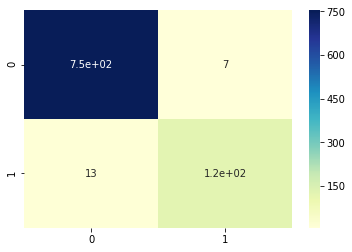

In [13]:
logit = LogisticRegression()
logit = logit.fit(x_train_scaled,y_train)
pd.DataFrame(logit.coef_,columns = x.columns).T
pred = logit.predict(x_test_scaled)
print('Area under ROC Curve: ',roc_auc_score(y_test,pred))
cm = pd.DataFrame(confusion_matrix(y_test,pred))

sns.heatmap(cm,annot = True,cmap="YlGnBu")

coeff = pd.DataFrame(logit.coef_,columns = x.columns,index= ['coefficients']).T
print(coeff)
print(type(logit.coef_))
fpr_sc, tpr_sc, _ = roc_curve(y_test,pred) 

In [14]:
from scipy.stats import norm

def logit_pvalue(model, x):
    
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
        
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    
    t =  coefs/se  
    
    p = (1 - norm.cdf(abs(t))) * 2
    
    r = []
    for i in range(1,len(coefs)):
        r.append([x.columns[i-1],abs(t[i]/p[i])])
    r = sorted(r,key= lambda x:x[1])
    print(pd.DataFrame(r,columns = ['col','importance']))
    return pd.DataFrame([coefs,se,t,p],columns = ['const']+list(x.columns),index = ['coefs','std err','z','p']).T

In [15]:
logit_pvalue(logit, x_train_scaled)

                      col  importance
0          M19_RESERVE_NR    0.479673
1         M18_TEMPERATURE    0.711024
2         M12_TEMPERATURE    1.155114
3         M12_ENZYME_FLOW    1.227047
4     M12_STABILIZER_FLOW    1.642609
5            M12_WATER_NR    4.894026
6         M19_TEMPERATURE   20.814853
7     M19_STABILIZER_FLOW  126.107941
8  M12_WETTING_AGENT_FLOW  126.818248
9  M19_WETTING_AGENT_FLOW  172.292000


,coefs,std err,z,p
const,-3.033456,0.187496,-16.178790,0.000000
M12_ENZYME_FLOW,-0.434914,0.679123,-0.640406,0.521908
M12_STABILIZER_FLOW,-0.472789,0.632708,-0.747247,0.454915
M12_TEMPERATURE,0.396448,0.640439,0.619025,0.535900
M12_WATER_NR,0.708247,0.602843,1.174845,0.240057
M12_WETTING_AGENT_FLOW,-0.861707,0.366032,-2.354184,0.018563
M18_TEMPERATURE,0.310512,0.676020,0.459323,0.646002
M19_RESERVE_NR,-0.187095,0.536355,-0.348828,0.727219
M19_STABILIZER_FLOW,-0.568750,0.241776,-2.352380,0.018654
M19_TEMPERATURE,-0.976454,0.563681,-1.732282,0.083223


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       760
          1       0.95      0.91      0.93       137

avg / total       0.98      0.98      0.98       897



In [17]:
# compare with statsmodels
import statsmodels.api as sm
sm_model = sm.Logit(y_train, sm.add_constant(x_train_scaled)).fit(disp=0)
#print(sm_model.pvalues)
sm_model.summary()
#print('Area under ROC Curve: ',roc_auc_score(y_test,sm_model.predict(x_test_scaled)))
#logit_pvalue(logit, x_train_scaled)

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Machine_state   No. Observations:                 2091
Model:                          Logit   Df Residuals:                     2080
Method:                           MLE   Df Model:                           10
Date:                Wed, 04 Jul 2018   Pseudo R-squ.:                  0.7989
Time:                        19:36:15   Log-Likelihood:                -173.27
converged:                       True   LL-Null:                       -861.64
                                        LLR p-value:                1.042e-289
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3.1872      0.193    -16.478      0.000      -3.566      -2.808
M12_ENZYME_FLOW           -0.2604      0.706     -0.369      0.712      -1.645       1.124
M12_STABILIZER_FLOW       -0.6240      0.665     -0.938      0.348      -1.928       0.680
M12_TEMPERATURE            0.5310      0.613      0.866      0.387      -0.671       1.733
M12_WATER_NR               0.8645      0.633      1.367      0.172      -0.375       2.104
M12_WETTING_AGENT_FLOW    -0.9132      0.370     -2.468      0.014      -1.639      -0.188
M18_TEMPERATURE            0.5501      0.662      0.831      0.406      -0.748       1.848
M19_RESERVE_NR            -0.2770      0.559     -0.495      0.620      -1.373       0.819
M19_STABILIZER_FLOW       -0.5790      0.248     -2.336      0.020      -1.065      -0.093
M19_TEMPERATURE           -1.2454      0.559     -2.228      0.026      -2.341      -0.150
M19_WETTING_AGENT_FLOW    -0.7398      0.312     -2.373      0.018      -1.351      -0.129
==========================================================================================
"""

In [18]:
def log_likelihood(features, target, weights,inter):
    scores = np.dot(weights,features).T
    scores += inter
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)))
    print(type(ll))
    return ll
ll = log_likelihood(x_train_scaled.T, pd.DataFrame(y_train), logit.coef_,logit.intercept_)
print(2*(len(coeff)  + 1 - float(ll)))
print(len(coeff))
print(ll)

from sklearn.mixture import GaussianMixture
for i in range(2,10):
    model = GaussianMixture(n_components=i, init_params='kmeans')
    model.fit(x_train_scaled)
    print(model.aic(x_train_scaled))

<class 'pandas.core.series.Series'>
369.5526927127758
10
Machine_state   -173.776346
dtype: float64
1730.8121978770005
-2182.081090054101
-26306.832283579395
-27316.592377922112
-36494.4773330767
-38793.020255681135
-41139.63010054278
-41214.32948319181


In [19]:
np.dot((y_test-logit.predict_proba(x_test_scaled)[:,1]),x_test)

array([-8.48787246e+00, -6.57254059e+00, -2.61027872e+02, -4.61232461e+06,
       -7.33023567e+00, -4.52408987e+02, -5.11061282e+04, -4.56274289e+00,
       -2.68054010e+02, -6.02085063e+00])

In [20]:
import numpy as np
# test p-values
#x = np.arange(10)[:, np.newaxis]
#y = np.array([0,0,0,1,0,0,1,1,1,1])

# compare with statsmodels
import statsmodels.api as sm
sm_model = sm.Logit(y_train, sm.add_constant(x_train_scaled)).fit(disp=0)
print(sm_model.pvalues)
sm_model.summary()


#log likelihood
def f(t):
    return 1/(1+np.exp(-t))

coeff_dict = dict(coeff['coefficients'])
def llikelihood(model,x,y):
    
    
    coeff = pd.DataFrame(logit.coef_,columns = x.columns,index= ['coefficients']).T
    df = pd.DataFrame()
    count = 0
    for i in coeff.index:
        if count == 0:
            df = pd.DataFrame(x_test_scaled[i].multiply(coeff_dict[i])).T.set_index([['0']]).T
        else:
            df.add(pd.DataFrame(x_test_scaled[i].multiply(coeff_dict[i])))
        count+=1
    df.add(float(logit.intercept_));
    df

const                     5.322086e-61
M12_ENZYME_FLOW           7.123968e-01
M12_STABILIZER_FLOW       3.483241e-01
M12_TEMPERATURE           3.866893e-01
M12_WATER_NR              1.717776e-01
M12_WETTING_AGENT_FLOW    1.359173e-02
M18_TEMPERATURE           4.060488e-01
M19_RESERVE_NR            6.203680e-01
M19_STABILIZER_FLOW       1.951322e-02
M19_TEMPERATURE           2.590320e-02
M19_WETTING_AGENT_FLOW    1.762935e-02
dtype: float64


## Visualisation of logistic regression

for making a plot for regression i need to do multiplication of coefficients with the respective columns and then addition of these columns to make 1 column and then plot the probability according to these.

#### For displaying logistic regression with 1 variable
* ax = sns.regplot( x = 'M12_WETTING_AGENT_FLOW', y = 'Machine_state', data=pd.concat([pd.DataFrame(y_train),x_train],axis = 1),logistic=True, n_boot=500, y_jitter=.03)

In [21]:
coeff_dict = dict(coeff['coefficients'])

df = pd.DataFrame()
count = 0
for i in coeff.index:
    if count == 0:
        df = pd.DataFrame(x_test_scaled[i].multiply(coeff_dict[i])).T.set_index([['0']]).T
    else:
        df.add(pd.DataFrame(x_test_scaled[i].multiply(coeff_dict[i])))
    count+=1
df.add(float(logit.intercept_));
np.sum(np.array(df))

14.819457783902472

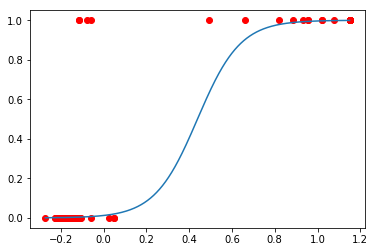

In [22]:
prob = df['0']
#prob = pd.DataFrame(logit.predict_proba(x_test_scaled))
fff = pd.DataFrame(logit.predict(x_test_scaled))
mini = float(df.min())
maxi = float(df.max())
mid = (mini + maxi)/2

def f(t):
    return 1/(1+np.exp(-10*(t - mid)))



plt.figure()
plt.plot(prob,fff,'ro')
#plt.plot([mid, mid], [0, 1], 'k--')
#plt.plot([mini, maxi],[0.5,0.5], 'k--')
ax = np.arange(mini,maxi,0.001)
axx = list(map(f,ax))
plt.plot(ax,axx)

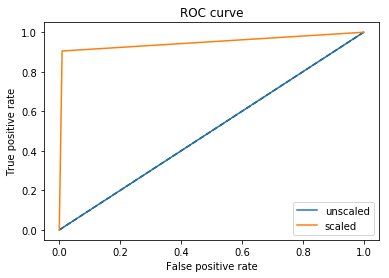

In [23]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_unsc, tpr_unsc, label='unscaled')
plt.plot(fpr_sc, tpr_sc, label='scaled')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

#### creating models with different hyperparameters to try and boost performance

In [25]:
predict = rf.predict(x_test)
confusion_matrix(y_test,predict)
print('Area under ROC Curve: ',roc_auc_score(y_test,pred))
sns.heatmap(cm,annot = True,cmap="YlGnBu")

ValueError: Classification metrics can't handle a mix of binary and continuous targets

#### So the above tree is compelety useless for this data

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(rf, out_file=None, feature_names=x.columns,class_names=['Machine_state'],filled=True, rounded=True,  special_characters=True) 
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydotplus

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree1.dot', feature_names = x_test.columns, rounded = True, precision = 1)



In [26]:

import pandas as pd
import numpy as np
import statsmodels.api as sm

"""data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target"""


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(x_train_scaled,y_train)

print('resulting features:')
print(result)

c:\users\aish.gupta\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
c:\users\aish.gupta\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:53: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Add  M12_STABILIZER_FLOW            with p-value 0.0
Add  M12_ENZYME_FLOW                with p-value 2.76391e-125
Drop M12_STABILIZER_FLOW            with p-value 0.183934
Add  M19_WETTING_AGENT_FLOW         with p-value 8.54831e-13
Add  M12_WETTING_AGENT_FLOW         with p-value 0.000484727
Add  M19_STABILIZER_FLOW            with p-value 0.00025438
Add  M12_WATER_NR                   with p-value 8.86469e-05
resulting features:
['M12_ENZYME_FLOW', 'M19_WETTING_AGENT_FLOW', 'M12_WETTING_AGENT_FLOW', 'M19_STABILIZER_FLOW', 'M12_WATER_NR']


In [27]:
print(list(x_train_scaled.columns))

['M12_ENZYME_FLOW', 'M12_STABILIZER_FLOW', 'M12_TEMPERATURE', 'M12_WATER_NR', 'M12_WETTING_AGENT_FLOW', 'M18_TEMPERATURE', 'M19_RESERVE_NR', 'M19_STABILIZER_FLOW', 'M19_TEMPERATURE', 'M19_WETTING_AGENT_FLOW']


In [28]:
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import preprocessing


features = x_train_scaled.columns.values
consider = []
i=1
for col in features:
        print("Including "+str(i)+": "+str(col))
        i+=1
        consider.append(col)
        
        X = x_train_scaled[consider].as_matrix()
        Y = y_train.as_matrix()

        log_regressor = linear_model.LinearRegression()
        score2 = cross_validation.cross_val_score(log_regressor,X,Y,cv=5)
        print ("lin_reg: mean="+str(np.mean(score2))+" std="+str(np.std(score2)))

Including 1: M12_ENZYME_FLOW
lin_reg: mean=0.835869259046914 std=0.05255424509852439
Including 2: M12_STABILIZER_FLOW
lin_reg: mean=0.8359760563994169 std=0.05260248679377752
Including 3: M12_TEMPERATURE
lin_reg: mean=0.8359363166815413 std=0.052607051903367626
Including 4: M12_WATER_NR
lin_reg: mean=0.8364205627922676 std=0.052841360884105085
Including 5: M12_WETTING_AGENT_FLOW
lin_reg: mean=0.8368461444250819 std=0.052029426914986396
Including 6: M18_TEMPERATURE
lin_reg: mean=0.836650342593057 std=0.05202699213119092
Including 7: M19_RESERVE_NR
lin_reg: mean=0.836720137193506 std=0.05201838610323464
Including 8: M19_STABILIZER_FLOW
lin_reg: mean=0.8389260251697668 std=0.050913835978344146
Including 9: M19_TEMPERATURE
lin_reg: mean=0.8413842239325332 std=0.051444118394954386
Including 10: M19_WETTING_AGENT_FLOW
lin_reg: mean=0.8437300413063455 std=0.05033309052592739


c:\users\aish.gupta\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\aish.gupta\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
c:\users\aish.gupta\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
c:\users\aish.gupta\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_lau